In [1]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from joblib import dump
import matplotlib.pyplot as plt
import seaborn as sns
import os

/home/sud/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
current_dir = Path.cwd()
work_dir = current_dir.parent.parent
data_dir = f'{work_dir}/data'

In [3]:
def load_data(data_name):
    current_dir = Path.cwd()
    work_dir = current_dir.parent.parent
    data_dir = f'{work_dir}/data'
    df = pd.read_csv(f"{data_dir}/{data_name}.csv")
    return df

In [4]:
datasets = ['cleveland', 'hungarian', 'switzerland', 'longbeach_va'] 

In [5]:
def plot_sample_counts(X_train, X_test):
    data = pd.DataFrame({
        'Set': ["train", "test"],
        'Count': [X_train.shape[0], X_test.shape[0]]
    })
    
    ax = sns.barplot(x='Set', y='Count', data=data, errorbar=None)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title('Train vs. Test Set Sizes')
    plt.show()
    

def save_data_splits(X_train, X_test, y_train, y_test, dataset_name):
    output_dir = os.path.join(data_dir, dataset_name)
    os.makedirs(output_dir, exist_ok=True)
    dump(X_train, f"{output_dir}/X_train.pkl")
    dump(X_test, f"{output_dir}/X_test.pkl")
    dump(y_train, f"{output_dir}/y_train.pkl")
    dump(y_test, f"{output_dir}/y_test.pkl")

# cleveland

In [6]:
cleveland = load_data('cleveland')
cleveland.shape

(303, 14)

In [7]:
X = cleveland.drop(columns=['label'])
y = cleveland['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.shape, X_test.shape

((242, 13), (61, 13))

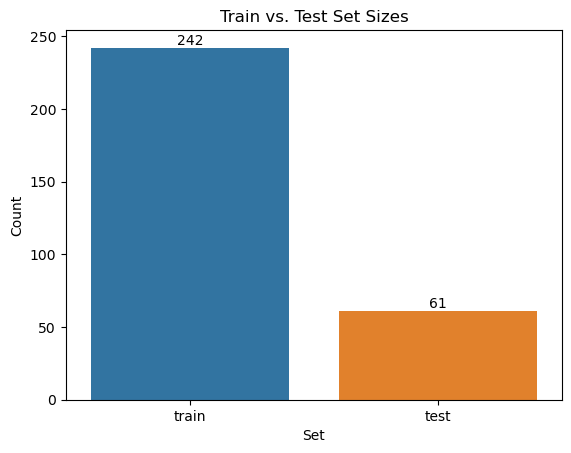

In [9]:
plot_sample_counts(X_train, X_test)

In [10]:
save_data_splits(X_train, X_test, y_train, y_test, 'cleveland')

# hungarian

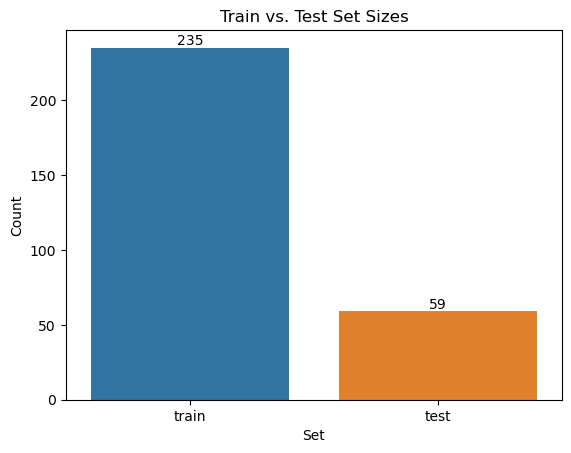

In [11]:
df = load_data('hungarian')
df.shape
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

save_data_splits(X_train, X_test, y_train, y_test, 'hungarian')


plot_sample_counts(X_train, X_test)

# switzerland

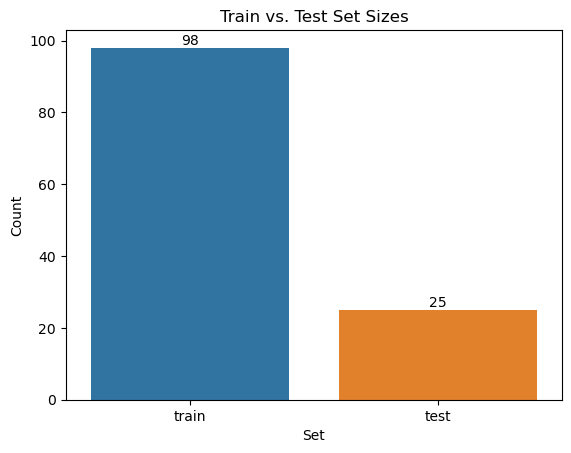

In [12]:
df = load_data('switzerland')
df.shape
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

save_data_splits(X_train, X_test, y_train, y_test, 'switzerland')

plot_sample_counts(X_train, X_test)

# longbeach_va

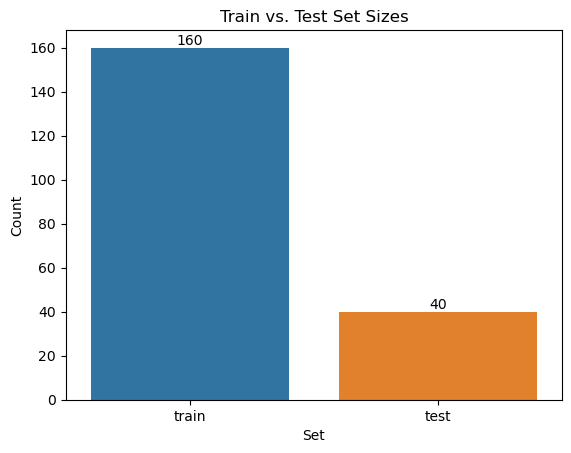

In [13]:
df = load_data('longbeach_va')
df.shape
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

save_data_splits(X_train, X_test, y_train, y_test, 'longbeach_va')


plot_sample_counts(X_train, X_test)